# 서비스

 - 알약과 같은 제품의 설명서나 함량은 매우 작은 글씨로 쓰여져 있기에 이를 읽기 힘든 사람들이 파악할 수 있는 서비스를 생각

In [1]:
# 라이브러리 불러오기
import os
import pytesseract
from PIL import Image
from pytesseract import Output
import keras_ocr
import matplotlib.pyplot as plt
%matplotlib inline

In [16]:
# 이미지 확인
# img_path = '/aiffel/project/Exploration/data'
img_path = os.getenv('HOME')+'/aiffel/project/Exploration/data'
img_list = os.listdir(img_path)
img_list

['2.jpg', '3.jpg', '1.jpg']

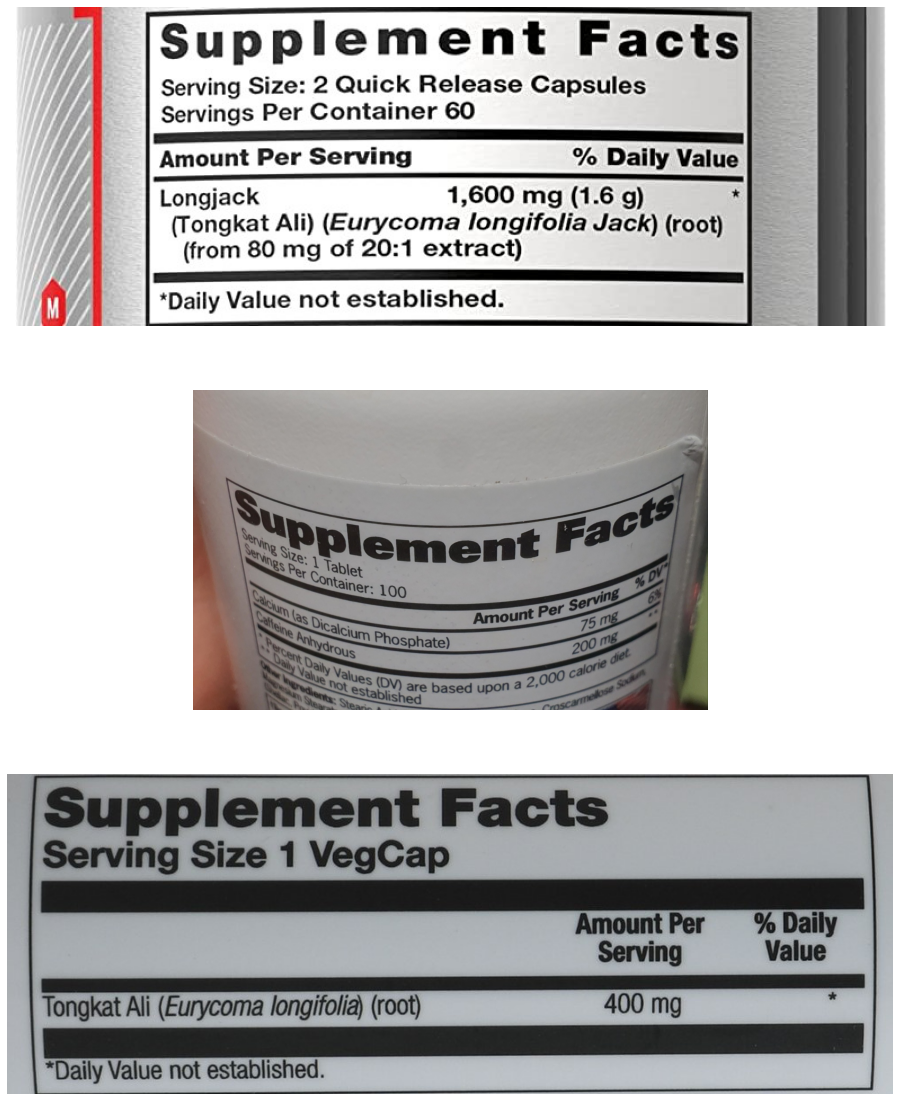

In [17]:
# 원본 이미지
fig, axs = plt.subplots(nrows=len(img_list), figsize=(20, 20))
for i, ax in enumerate(axs):
    image = Image.open(os.path.join(img_path, img_list[i]))
    ax.imshow(image)
    ax.axis("off")

plt.show()

# keras-ocr

In [18]:
pipeline = keras_ocr.pipeline.Pipeline()

Looking for /aiffel/.keras-ocr/craft_mlt_25k.h5
Looking for /aiffel/.keras-ocr/crnn_kurapan.h5


In [19]:
images = [keras_ocr.tools.read(os.path.join(img_path, img)) for img in img_list]
prediction_groups = [pipeline.recognize([os.path.join(img_path, img)]) for img in img_list]

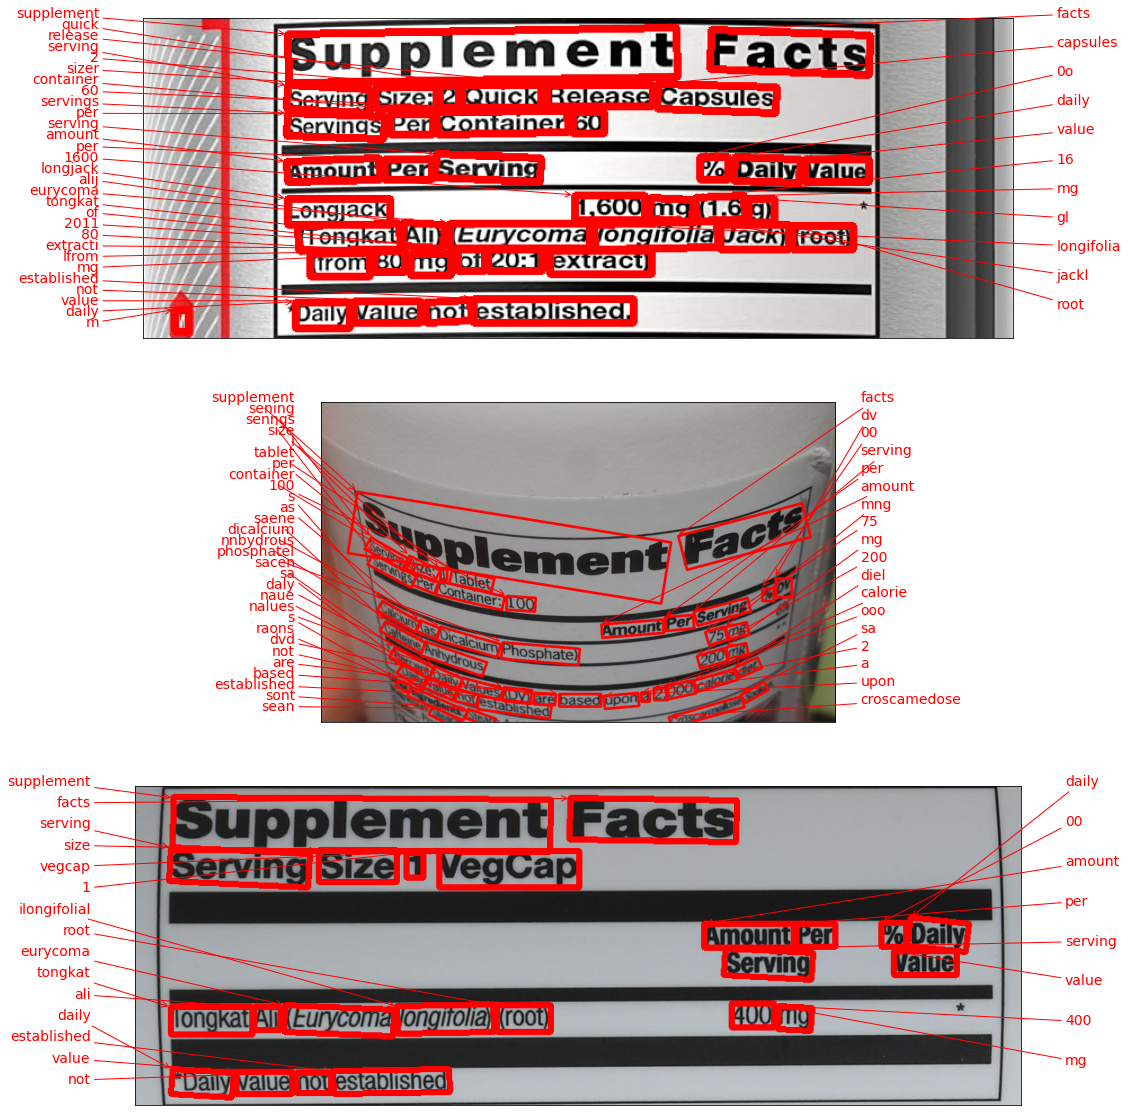

In [20]:
# Plot the predictions
fig, axs = plt.subplots(nrows=len(images), figsize=(20, 20))
for idx, ax in enumerate(axs):
    keras_ocr.tools.drawAnnotations(image=images[idx], 
                                    predictions=prediction_groups[idx][0], ax=ax)

# Tesseract

In [21]:
def recognize_images(image_path, output_path='./output'):
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    custom_oem_psm_config = r'--oem 3 --psm 3'
    image = Image.open(image_path)

    recognized_data = pytesseract.image_to_data(
        image, lang='eng',    # 한국어라면 lang='kor'
        config=custom_oem_psm_config,
        output_type=Output.DICT
    )
    
    top_level = max(recognized_data['level'])
    index = 0
    cropped_image_path_list = []
    for i in range(len(recognized_data['level'])):
        level = recognized_data['level'][i]
    
        if level == top_level:
            left = recognized_data['left'][i]
            top = recognized_data['top'][i]
            width = recognized_data['width'][i]
            height = recognized_data['height'][i]
            
            output_img_path = os.path.join(output_path, f"{str(index).zfill(4)}.png")
            cropped_image = image.crop((
                left,
                top,
                left+width,
                top+height
            ))
            cropped_image.save(output_img_path)
            cropped_image_path_list.append(output_img_path)
            index += 1
            
    custom_oem_psm_config = r'--oem 3 --psm 7'
    
    for image_path in cropped_image_path_list:
        image = Image.open(image_path)
        recognized_data = pytesseract.image_to_string(
            image, lang='eng',    # 한국어라면 lang='kor'
            config=custom_oem_psm_config,
            output_type=Output.DICT
        )
        print(recognized_data['text'])
    print("Done")
    print()

In [22]:
for img in img_list:
    print(f"[{img}]")
    try:
        recognize_images(os.path.join(img_path, img))
    except Exception:
        print(f"Recognition failed from {img}")
        print()

[2.jpg]
Supplement

Facts

Serving

Size:

?

Quick

Release

Capsules

Servings

Mer

Container

60

|

|



|

|

| (from 80 mg of 20:1 extract) |

| ‘Daily Value notestablished.

Ty

Amount

Ver

 -erving

of,

Vaily

Value

2

; |

Longjack

1,600

ig

(1.6

Gg)

*

(Tongkat

All)

(curycoma

longifolia

Jack)

(root)

(from

$3)

mg

OT

40:7

extract)

“Daily

Vaiue

not

estanlisnead.

| /

Done

[3.jpg]
; : =F

Done

[1.jpg]
Supplement

-acts

Serving

Size

|

VegCap

Amount

Per

%

Daily

Serving

Vaiue

*

Tongkat

Alt

(Eurycoma

longifolia)

(TOOT)

ADO

TQ

— A

“Daily

Value

not

estanlisned.

Done



### Tesseract  결과 정리
[1.jpg]
Supplement -acts

Serving Size | VegCap

Amount Per Serving

% Daily Vaiue

Tongkat Alt (Eurycoma longifolia) (TOOT)

ADO TQ — A

“Daily Value not estanlisned.

---

[2.jpg]<br/>
Supplement Facts

Serving Size: ? Quick Release Capsules

Servings Mer Container 60

| (from 80 mg of 20:1 extract) |

| ‘Daily Value notestablished.

Ty

Amount Ver -erving

of, Vaily Value

Longjack

1,600ig(1.6 Gg)

(Tongkat All)(curycoma longifolia Jack)(root)

(from $3mg OT 40:7 extract)

“Daily Vaiue not estanlisnead.

---

[3.jpg]



# 결과
keras-ocr이 tesseract보다 훨씬 낫다. 특히 3.jpg의 경우 아예 인식을 하지 못하였다.

# 회고

- OCR모델을 처음 써보았기에 신기하였다.
- 다른 기술과 결합하면 조금 더 인식이 잘 될것 같은 생각이 들었다.